# Python実践データ分析 100本ノック  
## 第10章

### ノック91

In [1]:
import pandas as pd
survey = pd.read_csv("../sample_100knocks/サンプルコード_20200325/10章/survey.csv")
survey.head()

,datetime,comment,satisfaction
0,2019/3/11,駅前に若者が集まっている(AA駅),1
1,2019/2/25,スポーツできる場所があるのが良い,5
2,2019/2/18,子育て支援が嬉しい,5
3,2019/4/9,保育園に入れる（待機児童なし）,4
4,2019/1/6,駅前商店街が寂しい,2


In [2]:
survey.isnull().sum()

datetime        0
comment         2
satisfaction    0
dtype: int64

In [4]:
survey = survey.dropna()
survey.isnull().sum()

datetime        0
comment         0
satisfaction    0
dtype: int64

### ノック92

In [5]:
survey["comment"] = survey["comment"].str.replace("AA", "")
survey.head()

,datetime,comment,satisfaction
0,2019/3/11,駅前に若者が集まっている(駅),1
1,2019/2/25,スポーツできる場所があるのが良い,5
2,2019/2/18,子育て支援が嬉しい,5
3,2019/4/9,保育園に入れる（待機児童なし）,4
4,2019/1/6,駅前商店街が寂しい,2


In [8]:
survey["comment"] = survey["comment"].str.replace("\(.+?\)", "")
survey["comment"] = survey["comment"].str.replace("\（.+?\）", "")
survey.head()

,datetime,comment,satisfaction
0,2019/3/11,駅前に若者が集まっている,1
1,2019/2/25,スポーツできる場所があるのが良い,5
2,2019/2/18,子育て支援が嬉しい,5
3,2019/4/9,保育園に入れる,4
4,2019/1/6,駅前商店街が寂しい,2


### ノック93

In [9]:
survey["comment_length"] = 0
survey.head()

,datetime,comment,satisfaction,comment_length
0,2019/3/11,駅前に若者が集まっている,1,0
1,2019/2/25,スポーツできる場所があるのが良い,5,0
2,2019/2/18,子育て支援が嬉しい,5,0
3,2019/4/9,保育園に入れる,4,0
4,2019/1/6,駅前商店街が寂しい,2,0


In [21]:
survey["comment_length"] = survey["comment"].str.len()
survey.head()

,datetime,comment,satisfaction,comment_length
0,2019/3/11,駅前に若者が集まっている,1,12
1,2019/2/25,スポーツできる場所があるのが良い,5,16
2,2019/2/18,子育て支援が嬉しい,5,9
3,2019/4/9,保育園に入れる,4,7
4,2019/1/6,駅前商店街が寂しい,2,9


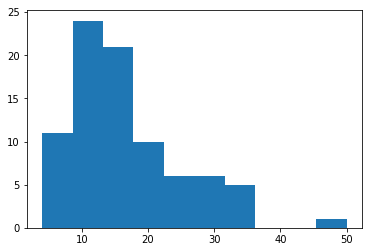

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(survey["comment_length"])
plt.show()

### ノック94

In [25]:
import MeCab
tagger = MeCab.Tagger()
text = "すもももももももものうち"
words = tagger.parse(text)
words

'すもも\t名詞,一般,*,*,*,*,すもも,スモモ,スモモ\nも\t助詞,係助詞,*,*,*,*,も,モ,モ\nもも\t名詞,一般,*,*,*,*,もも,モモ,モモ\nも\t助詞,係助詞,*,*,*,*,も,モ,モ\nもも\t名詞,一般,*,*,*,*,もも,モモ,モモ\nの\t助詞,連体化,*,*,*,*,の,ノ,ノ\nうち\t名詞,非自立,副詞可能,*,*,*,うち,ウチ,ウチ\nEOS\n'

In [26]:
words = tagger.parse(text).splitlines()
words

['すもも\t名詞,一般,*,*,*,*,すもも,スモモ,スモモ',
 'も\t助詞,係助詞,*,*,*,*,も,モ,モ',
 'もも\t名詞,一般,*,*,*,*,もも,モモ,モモ',
 'も\t助詞,係助詞,*,*,*,*,も,モ,モ',
 'もも\t名詞,一般,*,*,*,*,もも,モモ,モモ',
 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ',
 'うち\t名詞,非自立,副詞可能,*,*,*,うち,ウチ,ウチ',
 'EOS']

In [29]:
words_arr = []
for i in words:
    if i == "EOS": continue
    word_tmp = i.split()[0]
    print(i)
    print(word_tmp)
    words_arr.append(word_tmp)
words_arr

すもも	名詞,一般,*,*,*,*,すもも,スモモ,スモモ
すもも
も	助詞,係助詞,*,*,*,*,も,モ,モ
も
もも	名詞,一般,*,*,*,*,もも,モモ,モモ
もも
も	助詞,係助詞,*,*,*,*,も,モ,モ
も
もも	名詞,一般,*,*,*,*,もも,モモ,モモ
もも
の	助詞,連体化,*,*,*,*,の,ノ,ノ
の
うち	名詞,非自立,副詞可能,*,*,*,うち,ウチ,ウチ
うち


['すもも', 'も', 'もも', 'も', 'もも', 'の', 'うち']